<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-데이터-다운로드" data-toc-modified-id="Step-1.-데이터-다운로드-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 1. 데이터 다운로드</a></span></li><li><span><a href="#Step-2.-데이터-정제-및-토큰화" data-toc-modified-id="Step-2.-데이터-정제-및-토큰화-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2. 데이터 정제 및 토큰화</a></span></li><li><span><a href="#Step-3.-모델설계" data-toc-modified-id="Step-3.-모델설계-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 3. 모델설계</a></span><ul class="toc-item"><li><span><a href="#Positional-Encoding" data-toc-modified-id="Positional-Encoding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Positional Encoding</a></span></li><li><span><a href="#Multi-Head-Attention" data-toc-modified-id="Multi-Head-Attention-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Multi-Head Attention</a></span></li><li><span><a href="#Position-wise-Feed-Forward-Network" data-toc-modified-id="Position-wise-Feed-Forward-Network-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Position-wise Feed-Forward Network</a></span></li><li><span><a href="#Encoder-레이어-구현하기" data-toc-modified-id="Encoder-레이어-구현하기-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Encoder 레이어 구현하기</a></span></li><li><span><a href="#Decoder-레이어-구현하기" data-toc-modified-id="Decoder-레이어-구현하기-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Decoder 레이어 구현하기</a></span></li><li><span><a href="#Encoder와-Decoder-클래스를-정의" data-toc-modified-id="Encoder와-Decoder-클래스를-정의-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Encoder와 Decoder 클래스를 정의</a></span></li><li><span><a href="#Transformer-완성하기" data-toc-modified-id="Transformer-완성하기-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Transformer 완성하기</a></span></li><li><span><a href="#Mask" data-toc-modified-id="Mask-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Mask</a></span></li></ul></li><li><span><a href="#Step-4.-훈련하기" data-toc-modified-id="Step-4.-훈련하기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 4. 훈련하기</a></span><ul class="toc-item"><li><span><a href="#Learning-Rate-Scheduler를-선언하고,-이를-포함하는-Adam-Optimizer를-선언" data-toc-modified-id="Learning-Rate-Scheduler를-선언하고,-이를-포함하는-Adam-Optimizer를-선언-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Learning Rate Scheduler를 선언하고, 이를 포함하는 Adam Optimizer를 선언</a></span></li><li><span><a href="#Loss-함수를-정의" data-toc-modified-id="Loss-함수를-정의-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loss 함수를 정의</a></span></li><li><span><a href="#train_step-함수를-정의" data-toc-modified-id="train_step-함수를-정의-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>train_step 함수를 정의</a></span></li><li><span><a href="#Attention-시각화-함수" data-toc-modified-id="Attention-시각화-함수-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Attention 시각화 함수</a></span></li><li><span><a href="#번역생성함수" data-toc-modified-id="번역생성함수-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>번역생성함수</a></span></li><li><span><a href="#학습" data-toc-modified-id="학습-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>학습</a></span></li></ul></li><li><span><a href="#Step-5.-평가" data-toc-modified-id="Step-5.-평가-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 5. 평가</a></span></li></ul></div>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io


# from tqdm import tqdm_notebook 
from tqdm.notebook import tqdm 
import random

import sentencepiece as spm
from konlpy.tag import Mecab

# Step 1. 데이터 다운로드
   

In [3]:
# train data load
data_dir = os.getenv('HOME')+'/aiffel/aiffelthon/data'
data_train_path = data_dir+"/Train_set_data.csv"
data_test_path = data_dir+"/Test_set_data_sampling(0223).csv"
full_data = pd.read_csv(data_train_path)
full_data_test = pd.read_csv(data_test_path)

In [4]:
full_data

,text,dial,reg,eng
0,생각이 쪼금씩 바뀌더라고,생각이 쪼금씩 바뀌드라고,jd,I've changed my mind a little bit.
1,어 알겠는가 외국인들이 그래도 잘 적응하고,어 알겄는가 외국인들이 그래도 잘 적응하고,jd,You know what? Foreigners still get used to it.
2,아으 갑자기 예전에 맹장 뜯은 게 생각난다.,아으 갑자기 예전에 맹장 뜯은 게 생각난디야.,jd,"All of a sudden, I think I've ripped off my ap..."
3,보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,jd,I have a lot of ideas about getting older in a...
4,약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도,약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도,jd,"It's a little bit of a tastey, but still..."
...,...,...,...,...
1065913,뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...,뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...,jd,I suppose I dont just go out to the nearest pl...
1065914,너는 만약에 그런 시대가 오면 네가 어떻게 활동할 것 같애?,너는 만약에 그런 시대가 오면 니가 어떻게 활동할 것 같애?,gs,How do you think you will be active when that ...
1065915,하이브도 있고 #조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는데,하이브도 있고 조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는디,jd,There is a hive a webtoon called the area of J...
1065916,추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이니까 할 말도 많고 이~,추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이난이 할 말도 많고 이~,jj,On Chuseok relatives and cousins only gathered...


In [5]:
full_data_test

,text,dial,reg,eng
0,그니까 거기 그 사진 찍는아니야 주상절리 마냥,그니까 거기 그 사진 찍는아니 주상절리 마냥,jj,So youre not taking that picture there are you...
1,집에 있으면,집에 이시믄,jj,If you are at home
2,먹고 취하잖아 그러면 취하면 한이 있잖아 사람이 왜 이게,먹어지믄 취하잖아 겅하*믄이 취하면 한이 있네 사람이 왜 이게,jj,"You're eating and getting drunk, and if you're..."
3,그렇지 그렇게하겠지,그렇지 겅하겠주게,jj,Thats right Ill do that
4,나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줬어,나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜,jj,I ot it as I know so I applied for another 100...
...,...,...,...,...
495,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,gs,Im worried about whether its stable or not bec...
496,잘 치거나 이렇게 했을 때 다 그냥 이렇게 손 한 번씩 다,잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다,gs,"When you hit well or did this, you're all just..."
497,아니 잘 안 맞지 넌,아니 잘 안 맞지 닌,gs,No it doesnt fit well you
498,진짜 너무 이거 조금 조금 미안하기도 하고 다른 사람들한테,진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테,gs,I'm so sorry about this.


In [6]:
full_data=pd.concat([full_data, full_data_test], axis=0)

In [7]:
full_data.info() #full_data: 1065918 full_data_test: 500

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066418 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1066418 non-null  object
 1   dial    1066418 non-null  object
 2   reg     1066418 non-null  object
 3   eng     1066418 non-null  object
dtypes: object(4)
memory usage: 40.7+ MB


In [8]:
full_data.isnull().sum()

text    0
dial    0
reg     0
eng     0
dtype: int64

In [9]:
def del_null_dupl(data):
    data=data.dropna(axis=0)
    data=data[~data.duplicated(subset=['text','dial','reg','eng'], keep= 'first')]
    data=data.reset_index(drop=True)# index reset하기 - 기존 index 제거 O
    return data

In [10]:
full_data=del_null_dupl(full_data) # ['text', 'dial', 'reg', 'eng'])

In [11]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066418 entries, 0 to 1066417
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1066418 non-null  object
 1   dial    1066418 non-null  object
 2   reg     1066418 non-null  object
 3   eng     1066418 non-null  object
dtypes: object(4)
memory usage: 32.5+ MB


In [12]:
full_data['eng_length'] = full_data['eng'].apply(lambda x : len(str(x).split()))
full_data['dial_length'] = full_data['dial'].apply(lambda x : len(str(x).split()))
full_data['eng_c_length'] = full_data['eng'].apply(lambda x : len(str(x)))
full_data['dial_c_length'] = full_data['dial'].apply(lambda x : len(str(x)))

In [13]:
regs = ['jj', 'jd', 'gs', 'cc', 'kw']

for reg in regs:
    count = full_data['dial'][full_data['reg']==reg].count()
    print(f'Dial_{reg} :', count)

Dial_jj : 259305
Dial_jd : 191123
Dial_gs : 121367
Dial_cc : 119055
Dial_kw : 375568


In [14]:
full_data.groupby(full_data['reg'])['eng_length'].mean()

reg
cc    14.617244
gs    13.541300
jd    14.028306
jj    11.169943
kw     9.538350
Name: eng_length, dtype: float64

In [15]:
full_data.groupby(full_data['reg'])['dial_length'].mean()

reg
cc    10.569275
gs     9.857605
jd     8.982775
jj     6.484364
kw     6.014850
Name: dial_length, dtype: float64

In [16]:
eng_data = full_data[['eng', 'eng_length']]
eng_data

,eng,eng_length
0,I've changed my mind a little bit.,7
1,You know what? Foreigners still get used to it.,9
2,"All of a sudden, I think I've ripped off my ap...",12
3,I have a lot of ideas about getting older in a...,14
4,"It's a little bit of a tastey, but still...",9
...,...,...
1066413,Im worried about whether its stable or not bec...,26
1066414,"When you hit well or did this, you're all just...",17
1066415,No it doesnt fit well you,6
1066416,I'm so sorry about this.,5


In [17]:
dial_data = full_data[['reg', 'dial', 'dial_length']]
dial_data

,reg,dial,dial_length
0,jd,생각이 쪼금씩 바뀌드라고,3
1,jd,어 알겄는가 외국인들이 그래도 잘 적응하고,6
2,jd,아으 갑자기 예전에 맹장 뜯은 게 생각난디야.,7
3,jd,보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,11
4,jd,약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도,9
...,...,...,...
1066413,gs,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,23
1066414,gs,잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다,12
1066415,gs,아니 잘 안 맞지 닌,5
1066416,gs,진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테,9


In [18]:
full_data["reg_dial"] = "<" + full_data["reg"] +"> "+full_data["dial"]
full_data["reg_dial"]

0                                         <jd> 생각이 쪼금씩 바뀌드라고
1                               <jd> 어 알겄는가 외국인들이 그래도 잘 적응하고
2                             <jd> 아으 갑자기 예전에 맹장 뜯은 게 생각난디야.
3                  <jd> 보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.
4                           <jd> 약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도
                                 ...                        
1066413    <gs> 뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더...
1066414                 <gs> 잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다
1066415                                     <gs> 아니 잘 안 맞지 닌
1066416                <gs> 진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테
1066417    <gs> 바퀴벌레가 방역을 해도 기어나와 가지고 이제는 쪼끔 마음이 쫌 나아지긴 했...
Name: reg_dial, Length: 1066418, dtype: object

In [19]:
full_data

,text,dial,reg,eng,eng_length,dial_length,eng_c_length,dial_c_length,reg_dial
0,생각이 쪼금씩 바뀌더라고,생각이 쪼금씩 바뀌드라고,jd,I've changed my mind a little bit.,7,3,34,13,<jd> 생각이 쪼금씩 바뀌드라고
1,어 알겠는가 외국인들이 그래도 잘 적응하고,어 알겄는가 외국인들이 그래도 잘 적응하고,jd,You know what? Foreigners still get used to it.,9,6,47,23,<jd> 어 알겄는가 외국인들이 그래도 잘 적응하고
2,아으 갑자기 예전에 맹장 뜯은 게 생각난다.,아으 갑자기 예전에 맹장 뜯은 게 생각난디야.,jd,"All of a sudden, I think I've ripped off my ap...",12,7,60,25,<jd> 아으 갑자기 예전에 맹장 뜯은 게 생각난디야.
3,보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,jd,I have a lot of ideas about getting older in a...,14,11,66,36,<jd> 보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.
4,약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도,약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도,jd,"It's a little bit of a tastey, but still...",9,9,43,27,<jd> 약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도
...,...,...,...,...,...,...,...,...,...
1066413,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,gs,Im worried about whether its stable or not bec...,26,23,144,80,<gs> 뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더...
1066414,잘 치거나 이렇게 했을 때 다 그냥 이렇게 손 한 번씩 다,잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다,gs,"When you hit well or did this, you're all just...",17,12,76,31,<gs> 잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다
1066415,아니 잘 안 맞지 넌,아니 잘 안 맞지 닌,gs,No it doesnt fit well you,6,5,25,11,<gs> 아니 잘 안 맞지 닌
1066416,진짜 너무 이거 조금 조금 미안하기도 하고 다른 사람들한테,진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테,gs,I'm so sorry about this.,5,9,24,32,<gs> 진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테


In [20]:
type(full_data['dial'][0])

str

In [21]:
# # 1. 모든 입력을 소문자로 변환합니다.
# # 2. 알파벳, 문장부호, 한글만 남기고 모두 제거합니다.
# # 3. 문장부호 양옆에 공백을 추가합니다.
# # 4. 문장 앞뒤의 불필요한 공백을 제거합니다.

def preprocess_sentence(sentence):

    length = len(sentence)
    match = re.search(r'(.+)\1{3,}', sentence) 
    if match or length == 0:
        return None

    sentence = sentence.lower()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!<>가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence)
    sentence = sentence.strip()

    return sentence

In [22]:
# encoder corpus
enc_corpus = full_data['eng'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [23]:
enc_corpus

0                        i ve changed my mind a little bit .
1          you know what ? foreigners still get used to it .
2          all of a sudden i think i ve ripped off my app...
3          i have a lot of ideas about getting older in a...
4              it s a little bit of a tastey but still . . .
                                 ...                        
1066413    im worried about whether its stable or not bec...
1066414    when you hit well or did this you re all just ...
1066415                            no it doesnt fit well you
1066416                            i m so sorry about this .
1066417    i fot it out even if the cockroaches crawled o...
Name: eng, Length: 1066418, dtype: object

In [24]:
len(enc_corpus[1])

49

문장의 최단 길이: 0
문장의 최장 길이: 713
문장의 평균 길이: 50


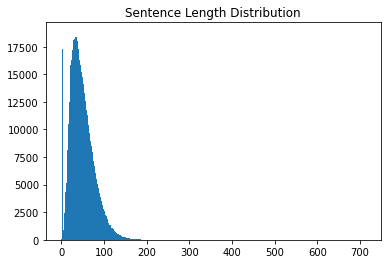

In [25]:
# enc_corpus 통계

min_len = 999
max_len = 0
sum_len = 0


for sen in enc_corpus:
    length = len(str(sen))
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(enc_corpus))

sentence_length = np.zeros((max_len), dtype=int)

#총 max_len의 배열을 만든 후, raw 문장을 돌면서 각 문장별 길이를 sentence_length의 len(sen) 인덱스마다  계속 더해가면서 counting
for sen in enc_corpus:
    sentence_length[len(str(sen))-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [26]:
dec_corpus = full_data['reg_dial'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [27]:
dec_corpus

0                                         <jd> 생각이 쪼금씩 바뀌드라고
1                               <jd> 어 알겄는가 외국인들이 그래도 잘 적응하고
2                            <jd> 아으 갑자기 예전에 맹장 뜯은 게 생각난디야 .
3                 <jd> 보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요 .
4                           <jd> 약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도
                                 ...                        
1066413    <gs> 뭐 두 분 쓰시는 게 없어서 뭐 안정적인 건지 살 잘 얘기를 안 하시더라고...
1066414                 <gs> 잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다
1066415                                     <gs> 아니 잘 안 맞지 닌
1066416                <gs> 진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테
1066417    <gs> 바퀴벌레가 방역을 해도 기어나와 가지고 이제는 쪼끔 마음이 쫌 나아지긴 했...
Name: reg_dial, Length: 1066418, dtype: object

문장의 최단 길이: 4
문장의 최장 길이: 221
문장의 평균 길이: 31


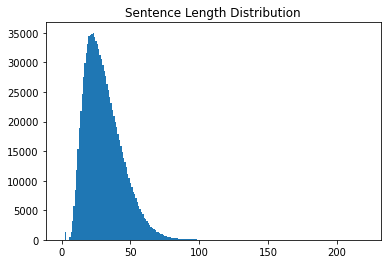

In [28]:
# dec_corpus 통계

min_len = 999
max_len = 0
sum_len = 0


for sen in dec_corpus:
    length = len(str(sen))
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(dec_corpus))

sentence_length = np.zeros((max_len), dtype=int)

#총 max_len의 배열을 만든 후, raw 문장을 돌면서 각 문장별 길이를 sentence_length의 len(sen) 인덱스마다  계속 더해가면서 counting
for sen in dec_corpus:
    sentence_length[len(str(sen))-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [29]:
len(enc_corpus)

1066418

In [30]:
len(dec_corpus)

1066418

In [31]:
#훈련 및 테스트셋 분리
enc_corpus=enc_corpus[:-500]
enc_corpus_test = enc_corpus[-500:]
dec_corpus=dec_corpus[:-500]
dec_corpus_test = dec_corpus[-500:]

In [32]:
print(enc_corpus.shape)
print(enc_corpus_test.shape)
print(dec_corpus.shape)
print(dec_corpus_test.shape)

(1065918,)
(500,)
(1065918,)
(500,)


# Step 2. 데이터 정제 및 토큰화

In [33]:
# Train 데이터 정제 및 토큰화
def clean_corpus(enc_corpus, dec_corpus):

    assert len(enc_corpus) == len(dec_corpus) # enc_corpus, dec_corpus가 같은 갯수라는 것을 검증받기 위해 적용

    cleaned_corpus = list(set(zip(enc_corpus, dec_corpus)))  # 중복된 데이터 제거
    
    return cleaned_corpus

cleaned_corpus = clean_corpus(enc_corpus, dec_corpus)
len(cleaned_corpus)

1065270

In [34]:
cleaned_corpus

[('i should talk again on monday', '<jd> 월요일날에나 다시 통화해봐야제 .'),
 ('so do that and if you look down here it looks unique in blue',
  '<jj> 행 겅 하고 여기 밑에 보면 파란 색깔로 이색 보이네 ?'),
 ('i wouldn t have sent kim in soon enough .',
  '<kw> 그랬으문 그더처 김기사를 보냈을 거 아니야 .'),
 ('i idiot couldnt have that purpose even if i was that old',
  '<jj> 나이가 겅 먹어도 그런 속셈을 못 해신디'),
 ('there is so its roaming around', '<jj> 이서 . 게난 돌아다니잖아 .'),
 ('oh i m listening . i can t hold on to this so i won t answer .',
  '<jj> 어 나 들엄서 이거 말 끈기믄 안되난 대답 안허는거'),
 ('come over here and eat this .', '<kw> 일루 와서 이그나 먹어라 .'),
 ('also asking about the accumulation of a name discount card right',
  '<jj> 또 상호명할인카드 막 적립 물어보잖아게 .'),
 ('i mean look at the world a little bit and i ll be able to experience it with you and i ll be able to help you with your part time job .',
  '<gs> 뭐 세상을 쫌 넓게 보고 웃음 겨 경험할 수 있는 거 그런 게 아르바이트한테 되게 도움'),
 ('and the plane too', '<jd> 비행기도 그러고'),
 ('isn t that right ?', '<jd> 끄치 않냐'),
 ('really real really its not th

In [38]:
# <PAD> : 0 / <BOS> : 1 / <EOS> : 2 / <UNK> : 3
# <jj> : 4 / <jd> : 5 / <gs> : 6 / <cc> : 7 / <kw> : 8

# Sentencepiece를 활용하여 학습한 tokenizer를 생성
def generate_tokenizer(corpus, vocab_size, lang="en", pad_id=0, bos_id=1, eos_id=2, unk_id=3):

    temp_file = os.getenv('HOME') + f'/aiffel/aiffelthon/corpus_{lang}.txt'     # corpus를 받아 txt파일로 저장
    
    with open(temp_file, 'w') as f:
        for row in corpus:
            f.write(str(row) + '\n')
    
    # Sentencepiece를 이용해 
    spm.SentencePieceTrainer.Train(
        f'--input={temp_file} --model_type=bpe --pad_id={pad_id} --bos_id={bos_id} --eos_id={eos_id} \
        --unk_id={unk_id} --model_prefix=spm{lang}_r0 --vocab_size={vocab_size} \
        --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw> --remove_extra_whitespaces=false'   # model_r0
    )
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(f'spm{lang}_r0.model') # model_r1

    return tokenizer

In [39]:
SRC_VOCAB_SIZE = TGT_VOCAB_SIZE = 4000

enc_corpus = []
dec_corpus = []

for pair in cleaned_corpus:
    e, d = pair[0], pair[1]
    # enc, dec 분리
    enc_corpus.append(e)
    dec_corpus.append(d)

#     enc_corpus.append(preprocess_sentence(e))
#     dec_corpus.append(preprocess_sentence(d))

enc_tokenizer = generate_tokenizer(enc_corpus, SRC_VOCAB_SIZE, "enc")
dec_tokenizer = generate_tokenizer(dec_corpus, TGT_VOCAB_SIZE, "dec")
dec_tokenizer.set_encode_extra_options("bos:eos")

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/aiffelthon/corpus_enc.txt --model_type=bpe --pad_id=0 --bos_id=1 --eos_id=2         --unk_id=3 --model_prefix=spmenc_r0 --vocab_size=4000         --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw> --remove_extra_whitespaces=false
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/aiffelthon/corpus_enc.txt
  input_format: 
  model_prefix: spmenc_r0
  model_type: BPE
  vocab_size: 4000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: <jj>
  user_defined_symbols: <jd

sentencepiece_trainer.cc(177) LOG(INFO) 

True

Running command: --input=/aiffel/aiffel/aiffelthon/corpus_dec.txt --model_type=bpe --pad_id=0 --bos_id=1 --eos_id=2         --unk_id=3 --model_prefix=spmdec_r0 --vocab_size=4000         --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw> --remove_extra_whitespaces=false
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/aiffelthon/corpus_dec.txt
  input_format: 
  model_prefix: spmdec_r0
  model_type: BPE
  vocab_size: 4000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: <jj>
  user_defined_symbols: <jd>
  user_defined_symbols: <gs>
  user_de

bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=881 min_freq=64
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=874 size=2320 all=379989 active=20039 piece=▁염
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=865 size=2340 all=381255 active=21305 piece=▁데는
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=853 size=2360 all=382539 active=22589 piece=▁거죠
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=847 size=2380 all=383807 active=23857 piece=▁발싸
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=839 size=2400 all=384745 active=24795 piece=▁데서
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=839 min_freq=62
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=832 size=2420 all=385706 active=20186 piece=▁사실은
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=820 size=2440 all=386708 active=21188 piece=▁기다려
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=813 size=2460 all=387603 active=22083 piece=두고
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=805 size=248

In [40]:
enc_corpus

['i should talk again on monday',
 'so do that and if you look down here it looks unique in blue',
 'i wouldn t have sent kim in soon enough .',
 'i idiot couldnt have that purpose even if i was that old',
 'there is so its roaming around',
 'oh i m listening . i can t hold on to this so i won t answer .',
 'come over here and eat this .',
 'also asking about the accumulation of a name discount card right',
 'i mean look at the world a little bit and i ll be able to experience it with you and i ll be able to help you with your part time job .',
 'and the plane too',
 'isn t that right ?',
 'really real really its not that delicious when you eat chinese food',
 'maggie has a strong baby so she s allergic and her skin s a little red for inflammation .',
 'that s right . it s freezing .',
 'is that so',
 'its time to walk from your house',
 'im nervous so im also anxious',
 'i d like you to stop .',
 'i m talking to the guys at our company about you .',
 'what s the order these days ?',
 

In [41]:
dec_corpus

['<jd> 월요일날에나 다시 통화해봐야제 .',
 '<jj> 행 겅 하고 여기 밑에 보면 파란 색깔로 이색 보이네 ?',
 '<kw> 그랬으문 그더처 김기사를 보냈을 거 아니야 .',
 '<jj> 나이가 겅 먹어도 그런 속셈을 못 해신디',
 '<jj> 이서 . 게난 돌아다니잖아 .',
 '<jj> 어 나 들엄서 이거 말 끈기믄 안되난 대답 안허는거',
 '<kw> 일루 와서 이그나 먹어라 .',
 '<jj> 또 상호명할인카드 막 적립 물어보잖아게 .',
 '<gs> 뭐 세상을 쫌 넓게 보고 웃음 겨 경험할 수 있는 거 그런 게 아르바이트한테 되게 도움',
 '<jd> 비행기도 그러고',
 '<jd> 끄치 않냐',
 '<cc> 음 진짜 레알 지 아 진짜로 엄청 중식을 먹으면 그렇게 맛있지는 않드라고',
 '<jd> 애기를 낳는 매기가 강하기 때문에 알레르기가 있어가꼬 염증 있기는 좀 피부가 빨개지니까',
 '<jj> 기지 전투화가 얼어 .',
 '<jj> 긴 거 ?',
 '<jj> 걸엉 가도 될초레라 너네 집에서',
 '<jj> 불안하고 그니까 나도 막 이',
 '<kw> 그마 두면 좋으련만 .',
 '<kw> 내가 우리 회사 바지씨 직원들한테 누누이 얘기하잖아 .',
 '<kw> 요즘 그른 순서가 어딨어 ?',
 '<jj> 난 영화로 여러 번 봤던 게 도둑들도 여러 번 봔 .',
 '<kw> 멍청이 이 사램이 제 오빤데 너머 머리가 오빠가 그랬잖아 .',
 '<kw> 아이 장모님도 그럼 망금 재벌 뒤게요 .',
 '<kw> 그눔어 밧줄 빗물 받이 빗물 받이 이거 기에 함석노래니 곰방 상하네 .',
 '<jj> 여기가 빈 사람은 먹어도 그렇게 살로 많이 안 간댄 게',
 '<kw> 물건을 하나 둘 사 모으기 시작했던 것 같애 .',
 '<jj> 벌 아직까지 나이 이서도 벌멍 게',
 '<jj> 뭐 고기 같은 거 뭐 이서난나게',
 '<jj> 자리젓도 자리젓은 잘 모르게신디 아무튼',
 '<kw> 운제 겨론하는지 궁금해들 하던데 .',
 '<jj> 강냉이 밀가

In [42]:
len(enc_corpus)

1065270

In [43]:
len(dec_corpus)

1065270

In [44]:
print(enc_tokenizer.EncodeAsPieces(enc_corpus[5000]))

['▁no', '▁it', '▁could', '▁play', '▁any', '▁game', '▁.']


In [45]:
print(dec_tokenizer.EncodeAsPieces(dec_corpus[5000]))

['<s>', '▁', '<jj>', '▁아니', '▁그건', '▁어떤', '▁게임', '도', '▁할', '수', '▁있언', '▁.', '</s>']


In [46]:
print(enc_tokenizer.EncodeAsIds(enc_corpus[1000]))

[71, 457, 609, 11, 153, 58, 344]


In [47]:
print(dec_tokenizer.EncodeAsIds(dec_corpus[1000]))

[1, 2512, 4, 2492, 78, 530, 2520, 2523, 2828, 220, 2]


In [48]:
# 토크나이저를 활용해 토큰의 길이가 >5 이상인 데이터를 선별하여 src_corpus 와 tgt_corpus 를 각각 구축하고, 텐서 enc_train 과 dec_train 으로 변환
src_corpus = [] #영어
tgt_corpus = [] #사투리

assert len(enc_corpus) == len(dec_corpus)

# 토큰의 길이가 xxx 이하인 문장만 남깁니다. 
for idx in tqdm(range(len(enc_corpus))):
    src = enc_tokenizer.EncodeAsIds(str(enc_corpus[idx]))
    tgt = dec_tokenizer.EncodeAsIds(str(dec_corpus[idx]))
    
    if len(src) >= 5 : 
        src_corpus.append(src)
        tgt_corpus.append(tgt)

# 패딩처리를 완료하여 학습용 데이터를 완성합니다. 
enc_train = tf.keras.preprocessing.sequence.pad_sequences(src_corpus, padding='post')
dec_train = tf.keras.preprocessing.sequence.pad_sequences(tgt_corpus, padding='post')

  0%|          | 0/1065270 [00:00<?, ?it/s]

In [49]:
# # 훈련 데이터와 검증 데이터로 분리하기
# enc_train, enc_val, dec_train, dec_val = train_test_split(enc_data, dec_data, test_size=0.05)

In [50]:
# enc, dec 의 seq_length는 달라도 상관없음.
print(enc_train.shape)
print(dec_train.shape)
# print(enc_val.shape)
# print(dec_val.shape)

(999693, 168)
(999693, 117)


In [51]:
dec_tokenizer.encode('사랑해')

[1, 852, 2536, 2]

In [52]:
dec_tokenizer.encode('<jd>')

[1, 2512, 5, 2]

# Step 3. 모델설계

## Positional Encoding

In [53]:
# pos - 단어가 위치한 Time-step(각각의 토큰의 위치정보값이며 정수값을 의미)
# d_model - 모델의 Embedding 차원 수
# i - Encoding차원의 index

def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i)/d_model)  # np.power(a,b) > a^b(제곱)
    
    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]
    
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])
    
    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
    
    return sinusoid_table

## Multi-Head Attention

In [54]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        self.depth = d_model // self.num_heads
        
        self.W_q = tf.keras.layers.Dense(d_model)  # Linear Layer
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
        
        self.linear = tf.keras.layers.Dense(d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        
        # Scaled QK 값 구하기
        QK = tf.matmul(Q, K, transpose_b=True)
        scaled_qk = QK / tf.math.sqrt(d_k)
        
        if mask is not None:
            scaled_qk += (mask * -1e9)
        
        # 1. Attention Weights 값 구하기 -> attentions
        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        # 2. Attention 값을 V에 곱하기 -> out
        out = tf.matmul(attentions, V)
        return out, attentions
    
    def split_heads(self, x):
        """
        Embedding된 입력을 head의 수로 분할하는 함수
        
        x: [ batch x length x emb ]
        return: [ batch x length x heads x self.depth ]
        """
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])
        return split_x
    
    def combine_heads(self, x):
        """
        분할된 Embedding을 하나로 결합하는 함수
        
        x: [ batch x length x heads x self.depth ]
        return: [ batch x length x emb ]
        """
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))
        return combined_x
    
    def call(self, Q, K, V, mask):
        """
        Step 1: Linear_in(Q, K, V) -> WQ, WK, WV
        Step 2: Split Heads(WQ, WK, WV) -> WQ_split, WK_split, WV_split
        Step 3: Scaled Dot Product Attention(WQ_split, WK_split, WV_split)
                 -> out, attention_weights
        Step 4: Combine Heads(out) -> out
        Step 5: Linear_out(out) -> out
        """
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
        
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask
        )
        
        out = self.combine_heads(out)
        out = self.linear(out)
        
        return out, attention_weights

## Position-wise Feed-Forward Network

In [55]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.w_1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.w_2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.w_1(x)
        out = self.w_2(out)
            
        return out

print("슝=3")

슝=3


## Encoder 레이어 구현하기

In [56]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)
        
        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        # Multi-Head Attention
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual*1 
        
        # Position-Wise Feed Forward Network
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual*1 
        
        return out, enc_attn

## Decoder 레이어 구현하기

In [57]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, enc_out, causality_mask, padding_mask):
        # Masked Multi-Head Attention
        residual = x
        out = self.norm_1(x)
        #out, dec_attn = self.dec_self_attn(out, out, out, causality_mask)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual
        
        # Multi-Head Attention
        residual = out
        out = self.norm_2(out)
        #out, dec_enc_attn = self.enc_dec_attn(out, enc_out, enc_out, padding_mask)
        out, dec_enc_attn = self.enc_dec_attn(out, enc_out, enc_out, causality_mask)
        out = self.do(out)
        out += residual

        # Position-Wise Feed Forward Network
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

## Encoder와 Decoder 클래스를 정의
EncodeLayer 와 DecoderLayer 를 모두 정의했으니 이를 조립하는 것은 어렵지 않겠죠? 이를 이용해 Encoder와 Decoder 클래스를 정의합니다.

In [58]:
class Encoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)]
        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        out = x
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
            
        return out, enc_attns

In [59]:
class Decoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)]
        
    def call(self, x, enc_out, causality_mask, padding_mask):
        out = x
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = self.dec_layers[i](out, enc_out, causality_mask, padding_mask)
            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)
        
        return out, dec_attns, dec_enc_attns

## Transformer 완성하기


In [60]:
class Transformer(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, src_vocab_size, tgt_vocab_size,
                 pos_len, dropout=0.2, shared=True):
        super(Transformer, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)
        
        # 1. Embedding Layer 정의
        self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
        self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)
        
        # 2. Positional Encoding 정의
        self.pos_encoding = positional_encoding(pos_len, d_model)
        # 6. Dropout 정의
        self.do = tf.keras.layers.Dropout(dropout)
        
        # 3. Encoder / Decoder 정의
        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)
        
        # 4. Output Linear 정의
        self.fc = tf.keras.layers.Dense(tgt_vocab_size)
        
        # 5. Shared Weights
        self.shared = shared
        
        if shared:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))
        
        
    def embedding(self, emb, x):
        """
        입력된 정수 배열을 Embedding + Pos Encoding
        + Shared일 경우 Scaling 작업 포함

        x: [ batch x length ]
        return: [ batch x length x emb ]
        """
        seq_len = x.shape[1]
        out = emb(x)
        
        if self.shared:
            out *= tf.math.sqrt(self.d_model)
        
        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)
        
        return out
    
    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
        # Step 1: Embedding(enc_in, dec_in) -> enc_in, dec_in
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)
        
        # Step 2: Encoder(enc_in, enc_mask) -> enc_out, enc_attns
        enc_out, enc_attns = self.encoder(enc_in, enc_mask)

        # Step 3: Decoder(dec_in, enc_out, mask) -> dec_out, dec_attns, dec_enc_attns
        dec_out, dec_attns, dec_enc_attns = self.decoder(dec_in, enc_out, causality_mask, dec_mask)
        
        # Step 4: Out Linear(dec_out) -> logits
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns
    

## Mask

In [61]:
# Attention을 할 때에 <PAD> 토큰에도 Attention을 주는 것을 방지해 주는 역할
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_causality_mask(src_len, tgt_len):
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_mask = generate_padding_mask(tgt)

    dec_enc_causality_mask = generate_causality_mask(tgt.shape[1], src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_causality_mask)

    dec_causality_mask = generate_causality_mask(tgt.shape[1], tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_causality_mask)

    return enc_mask, dec_enc_mask, dec_mask

# Step 4. 훈련하기

In [62]:
transformer = Transformer(
    n_layers=2,
    d_model=512,
    n_heads=8,
    d_ff=2048,
    src_vocab_size=SRC_VOCAB_SIZE,
    tgt_vocab_size=TGT_VOCAB_SIZE,
    pos_len=200,
    dropout=0.2,
    shared=True
)

##  Learning Rate Scheduler를 선언하고, 이를 포함하는 Adam Optimizer를 선언

In [63]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [64]:
learning_rate = LearningRateScheduler(512)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

## Loss 함수를 정의


In [65]:
# Loss 함수 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    # Masking 되지 않은 입력의 개수로 Scaling하는 과정
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

## train_step 함수를 정의


In [66]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    gold = tgt[:, 1:]
        
    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt)

    # 계산된 loss에 tf.GradientTape()를 적용해 학습을 진행합니다.
    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = model(src, tgt, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions[:, :-1])

    # 최종적으로 optimizer.apply_gradients()가 사용됩니다. 
    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return loss, enc_attns, dec_attns, dec_enc_attns

In [74]:
ckpt = tf.train.Checkpoint(step = tf.Variable(1), optimizer = optimizer , transformer = transformer)
manager = tf.train.CheckpointManager(ckpt, './aiffel/saturi/tf_ckpts_gd12_r0',max_to_keep=1)

In [123]:
import os

print(os.getcwd())

/aiffel/aiffel/saturi


## Attention 시각화 함수

In [75]:
# Attention 시각화 함수
def visualize_attention(src, tgt, enc_attns, dec_attns, dec_enc_attns):
    def draw(data, ax, x="auto", y="auto"):
        import seaborn
        seaborn.heatmap(data, 
                        square=True,
                        vmin=0.0, vmax=1.0, 
                        cbar=False, ax=ax,
                        xticklabels=x,
                        yticklabels=y)
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Encoder Layer", layer + 1)
        for h in range(4):
            draw(enc_attns[layer][0, h, :len(src), :len(src)], axs[h], src, src)
        plt.show()
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Decoder Self Layer", layer+1)
        for h in range(4):
            draw(dec_attns[layer][0, h, :len(tgt), :len(tgt)], axs[h], tgt, tgt)
        plt.show()

        print("Decoder Src Layer", layer+1)
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        for h in range(4):
            draw(dec_enc_attns[layer][0, h, :len(tgt), :len(src)], axs[h], src, tgt)
        plt.show()

## 번역생성함수

In [76]:
# 번역 생성 함수
def evaluate(sentence, model, reg, src_tokenizer, tgt_tokenizer):
    sentence = preprocess_sentence(sentence)
    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens], maxlen=enc_train.shape[-1], padding='post')

    ids = []

    #     output = tf.expand_dims([tgt_tokenizer.bos_id()], 0)    
    # jj > 4, jd > 5, gs > 6 , cc > 7 , kw > 8
    output = tf.expand_dims([tgt_tokenizer.bos_id(), reg], 0) # reg포함
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = generate_masks(_input, output)
        

        predictions, enc_attns, dec_attns, dec_enc_attns = model(_input, output, enc_padding_mask, combined_mask, dec_padding_mask)
        
        predicted_id = tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()
        if tgt_tokenizer.eos_id() == predicted_id:
            result = tgt_tokenizer.decode_ids(ids)
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)
    result = tgt_tokenizer.decode_ids(ids)
    return pieces, result, enc_attns, dec_attns, dec_enc_attns

In [77]:
# 번역 생성 및 Attention 시각화 결합
def translate(sentence, model, reg, src_tokenizer, tgt_tokenizer, plot_attention=False):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = evaluate(sentence, model, reg, src_tokenizer, tgt_tokenizer)
    
    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    if plot_attention:
        visualize_attention(pieces, result.split(), enc_attns, dec_attns, dec_enc_attns)
  
    return result

In [78]:
examples = [
    "How was your day? I was the best.",
    "Take your time, please.",
    "I’m about to leave. Please hold for a moment.",
    "Have you heard of it?"
]

## 학습

In [79]:
# 학습
EPOCHS = 2
BATCH_SIZE = 64

def train_and_checkpoint(transformer, manager, EPOCHS):
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    
    else:
        print("Initializing from scratch.")


    for epoch in range(EPOCHS):
        total_loss = 0

        idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
        random.shuffle(idx_list)
        t = tqdm(idx_list)

        for (batch, idx) in enumerate(t):
            batch_loss, enc_attns, dec_attns, dec_enc_attns = train_step(enc_train[idx:idx+BATCH_SIZE],
                                                                         dec_train[idx:idx+BATCH_SIZE],
                                                                         transformer,
                                                                         optimizer)

            total_loss += batch_loss

            t.set_description_str('Epoch %2d' % (epoch + 1))
            t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
      
      
#         # 매 Epoch 마다 제시된 예문에 대한 번역 생성
#         for example in examples:
#             translate(example, transformer, 4, enc_tokenizer, dec_tokenizer)
            
 
        if int(ckpt.step) % 2 == 0:
            save_path = manager.save()
            print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))

In [80]:
train_and_checkpoint(transformer, manager, EPOCHS )

Initializing from scratch.


  0%|          | 0/15621 [00:00<?, ?it/s]

  0%|          | 0/15621 [00:00<?, ?it/s]

In [81]:
enc_corpus_test=list(enc_corpus_test)
enc_corpus_test

['you have to wake up and eat on time and clean up but its so neat',
 'hey he is the person who left the dry but he is the lawyers office who is smiling on the site',
 'i the nami sings like this and she has a short hair',
 'so if youre stressed out and do this',
 'theyribs are not recommended to go on a diet when they see it around them',
 'i think its a little bit like that right now',
 'yes he was like this with his name',
 'but our ceos name is so serious',
 'since its a comic id like to tell you tom jerry and dooly a baby dinosaur as a representative',
 'so ill eat until im drunk but anyway its only for me',
 'get the old age lets go lets go',
 'there were three of us',
 'so i liked a lot of friends who were a little bit long and mother seedlings',
 'ita is a name and i have to go to my sister',
 'how can we go abroad if we go there because we said we would go abroad',
 'i wonder if you like this kind of performance a little bit',
 'our title name is like that to me',
 'imly call 

In [82]:
dec_corpus_test=list(dec_corpus_test)
dec_corpus_test

['<cc> 일어나서 제시간에 밥을 먹어야 되구 청소를 해야 되는데 워낙 깔끔은 허셔 아주',
 '<jj> 야 드라이 맡긴 사람인디 변호사 사무장이라이 그 사람은이 웃음',
 '<cc> 아 나는 그 나미 씨 노래 이케 막 단발머리하구',
 '<gs> 그래서 스트레스받고 인자 이라면',
 '<cc> 그 친구두 막 케 주변에서 봤을 때 다이어트를 해야 한다라고 권하지 않는 친구인데',
 '<gs> 어 지금 살짝 쫌 그런 거 같기는 해 .',
 '<gs> 어 어 이름님하고 같이 또 이르케',
 '<cc> 아니 근데 우리 사장은 진짜 씅질이 너무 진짜 심각해 가지고 진짜',
 '<gs> 이 또 만화하니까 이 톰과 제리랑 아기 공룡 둘리를 쫌 대표적으로 얘기 드리고 싶은데요 .',
 '<jj> 거난 취할 때까지 먹음니가만은게 어쨌든 한 모금 배끼 나 직신 어신디',
 '<jj> 노각 얻어당 예 올래',
 '<jj> 우리 세 명이연',
 '<gs> 그래서 그렇게 약간 쫌 장모종인 친구들을 많이 좋아했는데',
 '<kw> 이름데리고 헝이한테 가봐야 돼요 .',
 '<jj> 이제 또 어디 우리 해외라도 갔다 오켄 핸 갔다 오믄 어떵',
 '<gs> 이런 공연 자체를 쫌 좋아하시는지도 저는 쫌 궁금해요 .',
 '<jd> 우리 이름 가 나한테 글던데',
 '<jj> 막 욕지거리 행 학교에 전화해불켄 전화해 버리겠다 막 영 행 가부니까 그 다음부턴 안 와 .',
 '<gs> 그 맛은 또 거 맛있데 겁나',
 '<jj> 십육 년도에 그만둔 거 닮거든 ?',
 '<jj> 그 전에는 일 년에 한 번씩은 올라가시난',
 '<jd> 소량의 밥과 인제 야채 중심으로 인자 식사를 그 하죠 한 이틀정도',
 '<jj> 근데 그런 거는이 룰도 단순하고이',
 '<jj> 다 삶이 또 이제 영 햄구나 완전 잘살아',
 '<jj> 너 그 때도 내 머리 망쳐놓고 또 망치고싶 ?',
 '<jj> 세균이 이렇게 기어서 기어댕기나',
 '<gs> 그니까 적정 시기에 교체를 할',
 '<jd> 마땅하지가 않

In [83]:
# # special token >> jj: 4, jd: 5, gs: 6 , cc: 7 , kw: 8 
print(dec_tokenizer.encode('<jj><jd><gs><cs><kw>'))

reg = {4 : '제주도', 5 : '전라도', 6 :'경상도',7:'충청도', 8:'강원도'}

for i in range(4,9) :
    print(f'{reg[i]} 사투리 :')    
    translate(enc_corpus_test[i] ,transformer, i, enc_tokenizer, dec_tokenizer)
    print()

[1, 2512, 4, 5, 6, 3, 3355, 3786, 3, 8, 2]
제주도 사투리 :
Input: theyribs are not recommended to go on a diet when they see it around them
Predicted translation: 그 사람들 보고싶은거 보면 다이어트한다고 추천 안 해줘서

전라도 사투리 :
Input: i think its a little bit like that right now
Predicted translation: 지금 쫌 그런 거 같애요 .

경상도 사투리 :
Input: yes he was like this with his name
Predicted translation: 응 그 이름 이랑 같이 이르케

충청도 사투리 :
Input: but our ceos name is so serious
Predicted translation: 근데 우리 그 우리 그 세멘 이름이 너무 심각하잖여 .

강원도 사투리 :
Input: since its a comic id like to tell you tom jerry and dooly a baby dinosaur as a representative
Predicted translation: 만화로 보구 싶으이까 아기자기자랑 대표랑 대표로 대표하는 거루다 하자 .



# Step 5. 평가

In [84]:
print(enc_corpus_test[0])
print(dec_corpus_test[0])

you have to wake up and eat on time and clean up but its so neat
<cc> 일어나서 제시간에 밥을 먹어야 되구 청소를 해야 되는데 워낙 깔끔은 허셔 아주


In [85]:
dec_tokenizer.encode_as_ids(dec_corpus_test[0])
enc_tokenizer.encode_as_ids(enc_corpus_test[0])

[27, 104, 30, 1476, 187, 40, 188, 82, 159, 40, 895, 187, 73, 107, 43, 2927]

In [86]:
translate(enc_corpus_test[0], transformer, 4, enc_tokenizer, dec_tokenizer)

Input: you have to wake up and eat on time and clean up but its so neat
Predicted translation: 일어나야 되고 시간 맞춰서 먹고 해야 되고 깨끗해사 되어


'일어나야 되고 시간 맞춰서 먹고 해야 되고 깨끗해사 되어'

In [91]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

def eval_bleu_single(model, reg, src_sentence, tgt_sentence, enc_tokenizer, dec_tokenizer, verbose=True):
    src_tokens = enc_tokenizer.encode_as_ids(src_sentence)
    tgt_tokens = dec_tokenizer.encode_as_ids(tgt_sentence)

    if (len(src_tokens) > 50): return None
    if (len(tgt_tokens) > 50): return None

    reference = tgt_sentence.split()
    candidate = translate(src_sentence, model, reg, enc_tokenizer, dec_tokenizer).split()

    score = sentence_bleu([reference], candidate,
                          smoothing_function=SmoothingFunction().method1)

    if verbose:
        print("Source Sentence: ", src_sentence)
        print("Model Prediction: ", candidate)
        print("Real: ", reference)
        print("Score: %lf\n" % score)
        
    return score

In [116]:
# single test
test_idx = 40

eval_bleu_single(transformer, 
                 reg,
                 enc_corpus_test[test_idx], 
                 dec_corpus_test[test_idx], 
                 enc_tokenizer, 
                 dec_tokenizer, 
                 verbose=True)

Input: its times hot with gel so theres no air conditioner and no fan at home
Predicted translation: 젤로 젤로 뜨거울 때니까 에어컨도 없고 집에서 팬션도 없고
Source Sentence:  its times hot with gel so theres no air conditioner and no fan at home
Model Prediction:  ['젤로', '젤로', '뜨거울', '때니까', '에어컨도', '없고', '집에서', '팬션도', '없고']
Real:  ['<jd>', '이십구', '도', '나가더만', '젤로', '더울', '때가', '긍께', '거기는', '에어컨도', '없고', '선풍기도', '없어', '집에가', '다']
Score: 0.028814



0.02881411017115445

In [105]:
def eval_bleu(model, reg, src_sentences, tgt_sentence, enc_tokenizer, dec_tokenizer, verbose=True):
    total_score = 0.0
    sample_size = len(src_sentences)
    
    for idx in tqdm(range(sample_size)):
        score = eval_bleu_single(model, reg, src_sentences[idx], tgt_sentence[idx], enc_tokenizer, dec_tokenizer, verbose)
        if not score: continue
        
        total_score += score
    
    print("Num of Sample:", sample_size)
    print("Total Score:", total_score / sample_size*100)

In [106]:
eval_bleu(transformer, reg, enc_corpus_test[:70], dec_corpus_test[:70], enc_tokenizer, dec_tokenizer, verbose=False)

  0%|          | 0/70 [00:00<?, ?it/s]

Input: you have to wake up and eat on time and clean up but its so neat
Predicted translation: 일어나서 시간 내서 먹고 툭 치워야 되는데 깔끔하게
Input: hey he is the person who left the dry but he is the lawyers office who is smiling on the site
Predicted translation: 야 그 사람 그 사람 그 사람 그 말 말린 사람인데 그 웃음 그 사장님이 웃음
Input: i the nami sings like this and she has a short hair
Predicted translation: 이케 남미도 불르고 막 이런 식으로 하고 막 머리도 짧고
Input: so if youre stressed out and do this
Predicted translation: 그니까 스트레스받고 이렇게 하면
Input: theyribs are not recommended to go on a diet when they see it around them
Predicted translation: 그 주변에 보면 뭐 보실라고 추천해준다 아이가 .
Input: i think its a little bit like that right now
Predicted translation: 지금 쫌 그런 거 같애요 .
Input: yes he was like this with his name
Predicted translation: 응 그 이름 이랑 같이 이르케
Input: but our ceos name is so serious
Predicted translation: 근데 우리 그 우리 그 세멘 이름이 너무 심각하데
Input: since its a comic id like to tell you tom jerry and dooly a baby dinosaur as a representative
Predicted tra

In [101]:
enc_corpus_test[1]

'hey he is the person who left the dry but he is the lawyers office who is smiling on the site'

In [102]:
dec_corpus_test[1]

'<jj> 야 드라이 맡긴 사람인디 변호사 사무장이라이 그 사람은이 웃음'

In [108]:
reg=4
eval_bleu(transformer, reg, enc_corpus_test, dec_corpus_test, enc_tokenizer, dec_tokenizer, verbose=False)

  0%|          | 0/500 [00:00<?, ?it/s]

Input: you have to wake up and eat on time and clean up but its so neat
Predicted translation: 일어나야 되고 시간 맞춰서 먹고 해야 되고 깨끗해사 되어
Input: hey he is the person who left the dry but he is the lawyers office who is smiling on the site
Predicted translation: 야이는 왼쪽에 왼쪽 사람인디 웃음
Input: i the nami sings like this and she has a short hair
Predicted translation: 영행으네 막 영 불르고 막 머리 짧은 머리도 있잖아
Input: so if youre stressed out and do this
Predicted translation: 게난 스트레스받고 영 허믄
Input: theyribs are not recommended to go on a diet when they see it around them
Predicted translation: 그 사람들 보고싶은거 보면 다이어트한다고 추천 안 해줘서
Input: i think its a little bit like that right now
Predicted translation: 약간 그런 거 닮아 .
Input: yes he was like this with his name
Predicted translation: 응 name도 영 name이랑
Input: but our ceos name is so serious
Predicted translation: 근데 우리 그 우리 그 사장님이 너무 심각하댄
Input: since its a comic id like to tell you tom jerry and dooly a baby dinosaur as a representative
Predicted translation: 만화니까 이
Input: so il

Input: did you see it
Predicted translation: 보긴 핸 ?
Input: obviously they know the absurdity when they go through it
Predicted translation: 분명히 그분들이 통해서 그분들이 통해서 그분들이 통해서
Input: but shouldnt we live over in this yearold age
Predicted translation: 근데 올해는 이 년에 살아야 되는 거 아니 ?
Input: but there are two months left
Predicted translation: 근데 두개월 남안


TypeError: not a string

In [ ]:
reg=8
eval_bleu(transformer, reg, enc_corpus_test, dec_corpus_test, enc_tokenizer, dec_tokenizer, verbose=False)

In [ ]:
# # Bleu example
# from datasets import load_metric

# bleu = load_metric("bleu")
# predictions = [["I", "have", "thirty", "six", "years"]] 
# references = [
#     [["I", "am", "thirty", "six", "years", "old"], ["I", "am", "thirty", "six"]]
# ]
# bleu.compute(predictions=predictions, references=references)

# # Bleu example
# from datasets import load_metric

# bleu = load_metric("bleu")
# #bleu = load_metric('sacrebleu')

# reference = [kor_corpus_test.split()]
# predictions = [translate(eng_corpus_test, transformer, en_tokenizer, ko_tokenizer).split()]

# bleu.compute(predictions=predictions, references=reference)

In [ ]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# %config InlineBackend.figure_format = 'retina'
 
# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# # mpl.font_manager._rebuild()

In [ ]:
# 매 Epoch 마다 제시된 예문에 대한 번역 생성시각화
# for example in examples:
#     translate(example, transformer, en_tokenizer, ko_tokenizer, plot_attention=True)